# DATA PREPARATION

In [62]:
#Importations des librairies
import pandas as pd
import os
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

In [48]:
# Chemin vers notre fichier de training
path = "/Users/idia/Documents/ProjetESILV/PythonData/data-analysis-satellite/sat.trn"

In [49]:
# On vérifie si le chemin existe
assert(os.path.isfile(path))

In [110]:
# Creation de la dataframe
df = pd.read_csv(path, sep = "\s+", header=None)

In [111]:
# On extrait les données et on ajoute le detail des colonnes pour une meilleure compréhension
df.columns = ['top left pixel / spectral band 1','top left pixel / spectral band 2','top left pixel / spectral band 3','top left pixel / spectral band 4','top middle pixel / spectral band 1','top middle pixel / spectral band 2','top middle pixel / spectral band 3','top middle pixel / spectral band 4','top right pixel  / spectral band 1','top right pixel / spectral band 2','top right pixel / spectral band 3','top right pixel / spectral band 4','middle left pixel / spectral band 1','middle left pixel / spectral band 2','middle left pixel / spectral band 3','middle left pixel / spectral band 4','center pixel / spectral band 1',' center pixel / spectral band 2','center pixel / spectral band 3','center pixel / spectral band 4','middle right pixel / spectral band 1','middle right pixel / spectral band 2','middle right pixel / spectral band 3','middle right pixel / spectral band 4','bottom left pixel / spectral band 1','bottom left pixel / spectral band 2','bottom left pixel / spectral band 3','bottom left pixel / spectral band 4','bottom middle pixel / spectral band 1','bottom middle pixel / spectral band 2','bottom middle pixel / spectral band 3','bottom middle pixel / spectral band 4','bottom right pixel / spectral band 1','bottom right pixel / spectral band 2','bottom right pixel / spectral band 3','bottom right pixel / spectral band 4','Class']
df.head()

,top left pixel / spectral band 1,top left pixel / spectral band 2,top left pixel / spectral band 3,top left pixel / spectral band 4,top middle pixel / spectral band 1,top middle pixel / spectral band 2,top middle pixel / spectral band 3,top middle pixel / spectral band 4,top right pixel / spectral band 1,top right pixel / spectral band 2,...,bottom left pixel / spectral band 4,bottom middle pixel / spectral band 1,bottom middle pixel / spectral band 2,bottom middle pixel / spectral band 3,bottom middle pixel / spectral band 4,bottom right pixel / spectral band 1,bottom right pixel / spectral band 2,bottom right pixel / spectral band 3,bottom right pixel / spectral band 4,Class
0,92,115,120,94,84,102,106,79,84,102,...,104,88,121,128,100,84,107,113,87,3
1,84,102,106,79,84,102,102,83,80,102,...,100,84,107,113,87,84,99,104,79,3
2,84,102,102,83,80,102,102,79,84,94,...,87,84,99,104,79,84,99,104,79,3
3,80,102,102,79,84,94,102,79,80,94,...,79,84,99,104,79,84,103,104,79,3
4,84,94,102,79,80,94,98,76,80,102,...,79,84,103,104,79,79,107,109,87,3


In [117]:
# On traduit l'élément class en ajoutant une case "type de sol" et en faisant la conversion appropriée
typeofsoils = {1 : "red soil", 2 : "cotton crop", 3 : "grey soil", 4 : "damp grey soil", 5 : "soil with vegetable", 7 : "very damp grey soil"}
df["typeofsoil"] = df["Class"]
df["typeofsoil"] = df.Class.map(typeofsoils)
df.head(10)

,top left pixel / spectral band 1,top left pixel / spectral band 2,top left pixel / spectral band 3,top left pixel / spectral band 4,top middle pixel / spectral band 1,top middle pixel / spectral band 2,top middle pixel / spectral band 3,top middle pixel / spectral band 4,top right pixel / spectral band 1,top right pixel / spectral band 2,...,bottom middle pixel / spectral band 1,bottom middle pixel / spectral band 2,bottom middle pixel / spectral band 3,bottom middle pixel / spectral band 4,bottom right pixel / spectral band 1,bottom right pixel / spectral band 2,bottom right pixel / spectral band 3,bottom right pixel / spectral band 4,Class,typeofsoil
0,92,115,120,94,84,102,106,79,84,102,...,88,121,128,100,84,107,113,87,3,grey soil
1,84,102,106,79,84,102,102,83,80,102,...,84,107,113,87,84,99,104,79,3,grey soil
2,84,102,102,83,80,102,102,79,84,94,...,84,99,104,79,84,99,104,79,3,grey soil
3,80,102,102,79,84,94,102,79,80,94,...,84,99,104,79,84,103,104,79,3,grey soil
4,84,94,102,79,80,94,98,76,80,102,...,84,103,104,79,79,107,109,87,3,grey soil
5,80,94,98,76,80,102,102,79,76,102,...,79,107,109,87,79,107,109,87,3,grey soil
6,76,102,106,83,76,102,106,87,80,98,...,79,103,104,83,79,103,104,79,3,grey soil
7,76,102,106,87,80,98,106,79,76,94,...,79,103,104,79,79,95,100,79,3,grey soil
8,76,89,98,76,76,94,98,76,76,98,...,75,91,96,71,79,87,93,71,4,damp grey soil
9,76,94,98,76,76,98,102,72,76,94,...,79,87,93,71,79,87,93,67,4,damp grey soil


# Data Visualisation

In [112]:
df.shape

(4435, 37)

In [113]:
df.columns

Index(['top left pixel / spectral band 1', 'top left pixel / spectral band 2',
       'top left pixel / spectral band 3', 'top left pixel / spectral band 4',
       'top middle pixel / spectral band 1',
       'top middle pixel / spectral band 2',
       'top middle pixel / spectral band 3',
       'top middle pixel / spectral band 4',
       'top right pixel  / spectral band 1',
       'top right pixel / spectral band 2',
       'top right pixel / spectral band 3',
       'top right pixel / spectral band 4',
       'middle left pixel / spectral band 1',
       'middle left pixel / spectral band 2',
       'middle left pixel / spectral band 3',
       'middle left pixel / spectral band 4', 'center pixel / spectral band 1',
       ' center pixel / spectral band 2', 'center pixel / spectral band 3',
       'center pixel / spectral band 4',
       'middle right pixel / spectral band 1',
       'middle right pixel / spectral band 2',
       'middle right pixel / spectral band 3',
       'm

In [118]:
df.sort_values(["Class"])

,top left pixel / spectral band 1,top left pixel / spectral band 2,top left pixel / spectral band 3,top left pixel / spectral band 4,top middle pixel / spectral band 1,top middle pixel / spectral band 2,top middle pixel / spectral band 3,top middle pixel / spectral band 4,top right pixel / spectral band 1,top right pixel / spectral band 2,...,bottom middle pixel / spectral band 1,bottom middle pixel / spectral band 2,bottom middle pixel / spectral band 3,bottom middle pixel / spectral band 4,bottom right pixel / spectral band 1,bottom right pixel / spectral band 2,bottom right pixel / spectral band 3,bottom right pixel / spectral band 4,Class,typeofsoil
3925,63,106,114,90,60,92,105,87,53,84,...,68,99,108,85,56,91,104,88,1,red soil
3610,53,73,90,79,57,73,90,76,57,77,...,59,95,109,87,63,99,113,92,1,red soil
3611,57,73,90,76,57,77,98,76,57,81,...,63,99,113,92,67,99,109,87,1,red soil
3612,57,77,98,76,57,81,98,83,57,85,...,67,99,109,87,63,95,104,87,1,red soil
3613,57,81,98,83,57,85,98,79,57,85,...,63,95,104,87,63,95,109,87,1,red soil
3614,57,85,98,79,57,85,98,83,53,85,...,63,95,109,87,67,95,100,87,1,red soil
3615,57,85,98,83,53,85,102,79,57,85,...,67,95,100,87,67,95,104,87,1,red soil
3616,53,85,98,83,57,89,106,87,60,94,...,63,95,113,87,59,95,113,92,1,red soil
3617,57,89,106,87,60,94,102,87,60,98,...,59,95,113,92,59,91,104,87,1,red soil
3618,60,94,102,87,60,98,111,87,60,94,...,59,91,104,87,55,87,104,87,1,red soil


In [119]:
# On peut apercevoir qu'il y a plus de sol rouge (red soil)
df.groupby(["typeofsoil"]).size().reset_index(name="counts")

,typeofsoil,counts
0,cotton crop,479
1,damp grey soil,415
2,grey soil,961
3,red soil,1072
4,soil with vegetable,470
5,very damp grey soil,1038


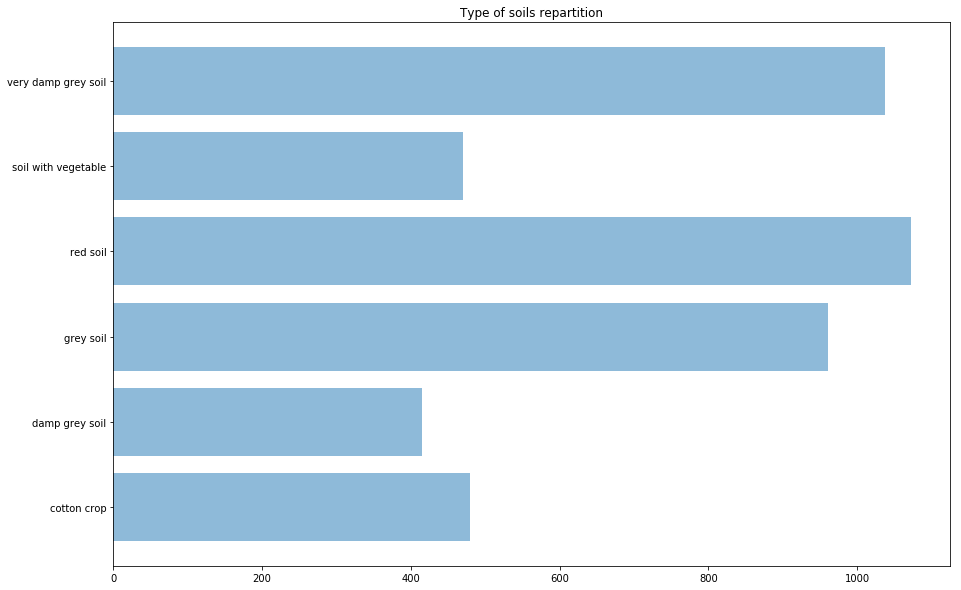

In [120]:
# On peut aussi avoir une vue graphique de la répartition de type de sols
group_by = df.groupby(['typeofsoil']).size().reset_index(name='counts')
types = group_by['typeofsoil']
count_by_type = group_by['counts']
y_pos = np.arange(len(types))
plt.figure(figsize=(15,10))
plt.barh(y_pos, count_by_type, align='center', alpha=0.5)
plt.yticks(y_pos, types)
plt.title('Type of soils repartition')
plt.show()

In [157]:
df_train = pd.read_csv(path, sep = "\s+", names = df, index_col = False)
df_train = df_train[['center pixel / spectral band 1',' center pixel / spectral band 2','center pixel / spectral band 3','center pixel / spectral band 4','Class']]
df_train.head()
X_train = df_train.iloc[:, :-1].values
y_train = df_train.iloc[:, 4].values

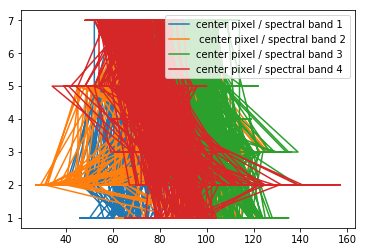

In [158]:
plt.plot(X_train, y_train)
plt.legend(['center pixel / spectral band 1',' center pixel / spectral band 2','center pixel / spectral band 3','center pixel / spectral band 4'])
plt.show()

# Modélisation

In [163]:
# On retire les colonnes à trouver soit "Classe" et "typeofsoil" 
cl_y = "Class"
cl_y_type = "typeofsoil"
X = df.drop({cl_y, cl_y_type}, axis="columns")
Y = df[cl_y]


In [164]:
X.head(10)

,top left pixel / spectral band 1,top left pixel / spectral band 2,top left pixel / spectral band 3,top left pixel / spectral band 4,top middle pixel / spectral band 1,top middle pixel / spectral band 2,top middle pixel / spectral band 3,top middle pixel / spectral band 4,top right pixel / spectral band 1,top right pixel / spectral band 2,...,bottom left pixel / spectral band 3,bottom left pixel / spectral band 4,bottom middle pixel / spectral band 1,bottom middle pixel / spectral band 2,bottom middle pixel / spectral band 3,bottom middle pixel / spectral band 4,bottom right pixel / spectral band 1,bottom right pixel / spectral band 2,bottom right pixel / spectral band 3,bottom right pixel / spectral band 4
0,92,115,120,94,84,102,106,79,84,102,...,134,104,88,121,128,100,84,107,113,87
1,84,102,106,79,84,102,102,83,80,102,...,128,100,84,107,113,87,84,99,104,79
2,84,102,102,83,80,102,102,79,84,94,...,113,87,84,99,104,79,84,99,104,79
3,80,102,102,79,84,94,102,79,80,94,...,104,79,84,99,104,79,84,103,104,79
4,84,94,102,79,80,94,98,76,80,102,...,104,79,84,103,104,79,79,107,109,87
5,80,94,98,76,80,102,102,79,76,102,...,104,79,79,107,109,87,79,107,109,87
6,76,102,106,83,76,102,106,87,80,98,...,113,87,79,103,104,83,79,103,104,79
7,76,102,106,87,80,98,106,79,76,94,...,104,83,79,103,104,79,79,95,100,79
8,76,89,98,76,76,94,98,76,76,98,...,96,75,75,91,96,71,79,87,93,71
9,76,94,98,76,76,98,102,72,76,94,...,96,71,79,87,93,71,79,87,93,67
